In [1]:
%run "..\..\Startup_py3.py"
sys.path.append(r"..\..\..\..\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import *
print(os.getpid())

import h5py
from ImageAnalysis3.classes import _allowed_kwds
import ast

18836


In [2]:
# Required plotting setting
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
import matplotlib.pyplot as plt
plt.rc('font', family='serif')
plt.rc('font', serif='Arial')
_font_size = 7.5

from ImageAnalysis3.figure_tools import _single_col_width, _font_size, _ticklabel_size,_ticklabel_width

In [3]:
postanalysis_folder = r'\\10.245.74.158\Chromatin_NAS_8\Analyzed_data\MouseBrain_PostAnalysis'
print("PostAnalysis Folder:", postanalysis_folder)
figure_folder = os.path.join(postanalysis_folder, 'Figures_0817')
print("Figure Folder:", figure_folder)

contact_figure_folder = os.path.join(figure_folder, 'LongRangeContacts')
if not os.path.exists(contact_figure_folder):
    print(f"Create contact_figure_folder: {contact_figure_folder}")
    os.makedirs(contact_figure_folder)
else:
    print(f"Use contact_figure_folder: {contact_figure_folder}")
comp_figure_folder = os.path.join(figure_folder, 'AB_compartment')
if not os.path.exists(comp_figure_folder):
    print(f"Create comp_figure_folder: {comp_figure_folder}")
    os.makedirs(comp_figure_folder)
else:
    print(f"Use comp_figure_folder: {comp_figure_folder}")

PostAnalysis Folder: \\10.245.74.158\Chromatin_NAS_8\Analyzed_data\MouseBrain_PostAnalysis
Figure Folder: \\10.245.74.158\Chromatin_NAS_8\Analyzed_data\MouseBrain_PostAnalysis\Figures_0817
Use contact_figure_folder: \\10.245.74.158\Chromatin_NAS_8\Analyzed_data\MouseBrain_PostAnalysis\Figures_0817\LongRangeContacts
Use comp_figure_folder: \\10.245.74.158\Chromatin_NAS_8\Analyzed_data\MouseBrain_PostAnalysis\Figures_0817\AB_compartment


## load codebook

In [4]:
import pandas as pd
codebook = pd.read_csv(r'\\10.245.74.158\Chromatin_NAS_8\Exported_data\20220713-Export\merged_codebook.csv')

In [5]:
sort_by_region = False
from ImageAnalysis3.structure_tools import distance

chr_2_indices, chr_2_orders = distance.Generate_PlotOrder(codebook, codebook, sort_by_region=sort_by_region)

## Load coordinates for subtypes

In [6]:
subclass_2_chr2Zxys_filename = os.path.join(postanalysis_folder, 'subclass_2_chr2Zxys.pkl')
subclass_2_chr2ZxysList = pickle.load(open(subclass_2_chr2Zxys_filename, 'rb'))

## load ensemble AB

In [7]:
ensemble_pc1_filename = os.path.join(postanalysis_folder, 'ensemble_pc1.npy')

ensemble_normed_PC1 = np.load(ensemble_pc1_filename)
print(ensemble_normed_PC1.shape)

# define AB
ensemble_AB_dict = {}
AB_th = -0.5
ensemble_AB_dict['A'] = np.where(ensemble_normed_PC1 > AB_th)[0]
ensemble_AB_dict['B'] = np.where(ensemble_normed_PC1 <= AB_th)[0]

# by chr
ensemble_chr_2_AB = {}
for _chr in chr_2_indices:
    _chr_AB = {
        'A':np.array([list(chr_2_indices[_chr]).index(_ind) 
                      for _ind in np.intersect1d(chr_2_indices[_chr], ensemble_AB_dict['A'])], dtype=np.int32),
        'B':np.array([list(chr_2_indices[_chr]).index(_ind) 
                      for _ind in np.intersect1d(chr_2_indices[_chr], ensemble_AB_dict['B'])], dtype=np.int32),
    }
    ensemble_chr_2_AB[_chr] = _chr_AB

(1981,)


## load AB densities

In [8]:
gaussian_radius = 0.5

In [9]:
# density
transABscores_ensemble_filename = os.path.join(postanalysis_folder, f'transABscores_ensembleAB_notNorm_r{gaussian_radius}.pkl')

subclass_2_transScoreDicts = pickle.load(open(transABscores_ensemble_filename, 'rb'))
# ratio
transABratio_ensemble_filename = os.path.join(postanalysis_folder, f'transABRatio_ensembleAB_notNorm_r{gaussian_radius}.pkl')

subclass_2_transABRatioDicts = pickle.load(open(transABratio_ensemble_filename, 'rb'))

In [10]:
# density
cisABscores_ensemble_filename = os.path.join(postanalysis_folder, f'cisABscores_ensembleAB_notNorm_r{gaussian_radius}.pkl')

subclass_2_cisScoreDicts = pickle.load(open(cisABscores_ensemble_filename, 'rb'))
# ratio
cisABratio_ensemble_filename = os.path.join(postanalysis_folder, f'cisABRatio_ensembleAB_notNorm_r{gaussian_radius}.pkl')

subclass_2_cisABRatioDicts = pickle.load(open(cisABratio_ensemble_filename, 'rb'))

# Plot Ratio

Oligo, L6b, Astro, VLMC, OPC, Endo, L6 CT, Peri, Micro, L6 IT, Sncg, L2/3 IT, Sst, L5 IT, Vip, Pvalb, Lamp5, L5/6 NP, L5 ET, L4/5 IT, SMC, other, 

Oligo, L6b, Astro, VLMC, OPC, Endo, L6 CT, Peri, Micro, L6 IT, Sncg, L2/3 IT, Sst, L5 IT, Vip, Pvalb, Lamp5, L5/6 NP, L5 ET, L4/5 IT, SMC, other, 

Oligo, L6b, Astro, VLMC, OPC, Endo, L6 CT, Peri, Micro, L6 IT, Sncg, L2/3 IT, Sst, L5 IT, Vip, Pvalb, Lamp5, L5/6 NP, L5 ET, L4/5 IT, SMC, other, 

<IPython.core.display.Javascript object>


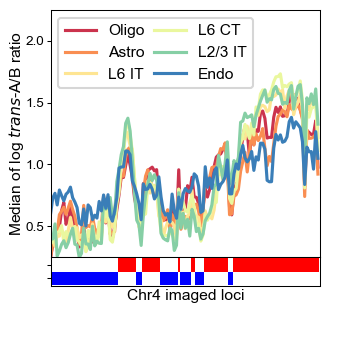

In [78]:
plot_chr = '4'
plot_subclasses = ['Oligo', 'Astro', 'L6 IT', 'L6 CT', "L2/3 IT", 'Endo']

subclass_2_medianTransABratios = {}

for _subcls, _chr2ABratios_list in subclass_2_transABRatioDicts.items():
    print(_subcls, end=', ')
    _all_ABratios = []
    for _chr2ABratios in _chr2ABratios_list:
        if plot_chr in _chr2ABratios:
            _ABratios = _chr2ABratios[plot_chr]
            _all_ABratios.extend(list(_ABratios))
    
    # append
    subclass_2_medianTransABratios[_subcls] = np.nanmedian(_all_ABratios, axis=0)


from matplotlib.cm import Spectral
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, _ax = plt.subplots(figsize=(_single_col_width, _single_col_width), sharex=True, sharey=False, dpi=150)

#for _i, (_subcls, _ax) in enumerate(zip(plot_subclasses, axes)):
for _i, _subcls in enumerate(plot_subclasses):
    _ax.plot(subclass_2_medianTransABratios[_subcls], 
             alpha=1, label=f'{_subcls}', color=Spectral((_i+0.5)/len(plot_subclasses)))

_ax.legend(fontsize=_font_size, markerscale=0.3, ncol=2, columnspacing=0.6, )
_ax.tick_params('both', labelsize=_font_size-1, 
                width=_ticklabel_width, length=_ticklabel_size,
                pad=1, labelleft=True, labelbottom=True) # remove bottom ticklabels for ax
[i[1].set_linewidth(_ticklabel_width) for i in _ax.spines.items()]

    
_ax.set_yticks(np.arange(0,3,0.5))
_ax.set_ylim([0.25, 2.25])
_ax.set_ylabel('Median of log $\it{trans}$-A/B ratio', fontsize=_font_size, labelpad=0)


# locate ax1
divider = make_axes_locatable(_ax)
bot_ax = divider.append_axes('bottom', size='12%', pad="0%", 
                             sharex=_ax, xticks=[])
bot_ax.bar(ensemble_chr_2_AB[plot_chr]['A'], 1, color='r',width=1, bottom=0)
bot_ax.bar(ensemble_chr_2_AB[plot_chr]['B'], -1, color='b',width=1, bottom=0)

#bot_ax.set_xticks((_chr_edges[1:] + _chr_edges[:-1])/2,)
#bot_ax.set_xticklabels(_chr_names, rotation=60)
bot_ax.tick_params('x', labelsize=_font_size-1, 
                width=_ticklabel_width, length=_ticklabel_size,
                pad=1, labelbottom=True) # remove bottom ticklabels for _ax
bot_ax.tick_params('y', labelsize=_font_size-1, 
                width=_ticklabel_width, length=0,
                pad=1, labelleft=True) # remove bottom ticklabels for _ax

bot_ax.set_xlim([0, len(chr_2_indices[plot_chr])])
bot_ax.set_yticks([-0.5,0.5])
bot_ax.set_yticklabels(['B','A'], fontsize=_font_size, )

bot_ax.set_xlabel(f'Chr{plot_chr} imaged loci', fontsize=_font_size, labelpad=1)

bot_ax.tick_params('both', labelsize=_font_size-1, 
                    width=_ticklabel_width, length=_ticklabel_size,
                    pad=1, labelleft=False, labelbottom=True) # remove bottom ticklabels for ax

[i[1].set_linewidth(_ticklabel_width) for i in bot_ax.spines.items()]

fig.subplots_adjust(wspace=0.0, hspace=0.0, left=0.15, right=0.95, top=0.97, bottom=0.15)

plt.savefig(os.path.join(comp_figure_folder, f"TransABratio_chr{plot_chr}.pdf"),
            transparent=True, bbox_inches='tight', dpi=300)
plt.show()

<IPython.core.display.Javascript object>


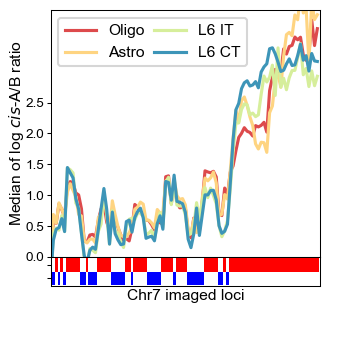

In [43]:
plot_chr = '7'

subclass_2_medianCisABratios = {}

for _subcls, _chr2ABratios_list in subclass_2_cisABRatioDicts.items():
    print(_subcls, end=', ')
    _all_ABratios = []
    for _chr2ABratios in _chr2ABratios_list:
        if plot_chr in _chr2ABratios:
            _ABratios = _chr2ABratios[plot_chr]
            _all_ABratios.extend(list(_ABratios))
    
    # append
    subclass_2_medianCisABratios[_subcls] = np.nanmedian(_all_ABratios, axis=0)
    
plot_subclasses = ['Oligo', 'Astro', 'L6 IT', 'L6 CT']

from matplotlib.cm import Spectral
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, _ax = plt.subplots(figsize=(_single_col_width, _single_col_width), sharex=True, sharey=False, dpi=150)

#for _i, (_subcls, _ax) in enumerate(zip(plot_subclasses, axes)):
for _i, _subcls in enumerate(plot_subclasses):
    _ax.plot(subclass_2_medianCisABratios[_subcls], 
             alpha=1, label=f'{_subcls}', color=Spectral((_i+0.5)/len(plot_subclasses)))

_ax.legend(fontsize=_font_size, markerscale=0.3, ncol=2, columnspacing=0.6, )
_ax.tick_params('both', labelsize=_font_size-1, 
                width=_ticklabel_width, length=_ticklabel_size,
                pad=1, labelleft=True, labelbottom=True) # remove bottom ticklabels for ax
[i[1].set_linewidth(_ticklabel_width) for i in _ax.spines.items()]

    
_ax.set_yticks(np.arange(0,3,0.5))
_ax.set_ylim([0, 4])
_ax.set_ylabel('Median of log $\it{cis}$-A/B ratio', fontsize=_font_size, labelpad=0)


# locate ax1
divider = make_axes_locatable(_ax)
bot_ax = divider.append_axes('bottom', size='12%', pad="0%", 
                             sharex=_ax, xticks=[])
bot_ax.bar(ensemble_chr_2_AB[plot_chr]['A'], 1, color='r',width=1, bottom=0)
bot_ax.bar(ensemble_chr_2_AB[plot_chr]['B'], -1, color='b',width=1, bottom=0)

#bot_ax.set_xticks((_chr_edges[1:] + _chr_edges[:-1])/2,)
#bot_ax.set_xticklabels(_chr_names, rotation=60)
bot_ax.tick_params('x', labelsize=_font_size-1, 
                width=_ticklabel_width, length=_ticklabel_size,
                pad=1, labelbottom=True) # remove bottom ticklabels for _ax
bot_ax.tick_params('y', labelsize=_font_size-1, 
                width=_ticklabel_width, length=0,
                pad=1, labelleft=True) # remove bottom ticklabels for _ax

bot_ax.set_xlim([0, len(chr_2_indices[plot_chr])])
bot_ax.set_yticks([-0.5,0.5])
bot_ax.set_yticklabels(['B','A'], fontsize=_font_size, )

bot_ax.set_xlabel(f'Chr{plot_chr} imaged loci', fontsize=_font_size, labelpad=1)

bot_ax.tick_params('both', labelsize=_font_size-1, 
                    width=_ticklabel_width, length=_ticklabel_size,
                    pad=1, labelleft=False, labelbottom=True) # remove bottom ticklabels for ax

[i[1].set_linewidth(_ticklabel_width) for i in bot_ax.spines.items()]

fig.subplots_adjust(wspace=0.0, hspace=0.0, left=0.15, right=0.95, top=0.97, bottom=0.15)

plt.savefig(os.path.join(comp_figure_folder, f"CisABratio_chr{plot_chr}.pdf"),
            transparent=True, bbox_inches='tight', dpi=300)
plt.show()

In [13]:
from sklearn.linear_model import LinearRegression

[0.79114784] -0.060310863073192555


<IPython.core.display.Javascript object>


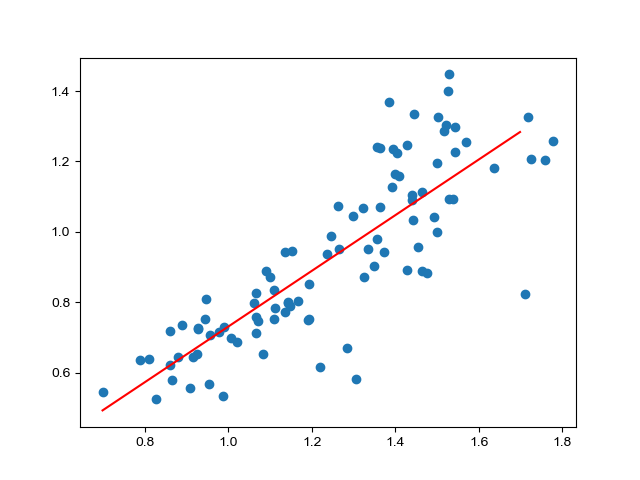

In [15]:
x_key = 'L6 CT'
y_key = 'Astro' #'Astro'

model = LinearRegression().fit(subclass_2_medianTransABratios[x_key][:,np.newaxis], subclass_2_medianTransABratios[y_key])
print(model.coef_, model.intercept_)
plt.figure()
plt.scatter(subclass_2_medianTransABratios[x_key], subclass_2_medianTransABratios[y_key])
xs = np.arange(min(subclass_2_medianTransABratios[x_key]), max(subclass_2_medianTransABratios[x_key]), 0.1)
ys = model.coef_ * xs + model.intercept_
plt.plot(xs, ys, 'r')

# Calculate segregation

In [21]:
_celltype_order = ['L2/3 IT','L4/5 IT','L5 IT','L6 IT','L5 ET','L5/6 NP','L6 CT','L6b',
     'Sncg','Sst','Vip','Pvalb','Lamp5',
     'Oligo','OPC','Endo','Astro','Micro','Peri','SMC','VLMC',
    ]

In [34]:
subclass_2_chr_2_cisSegs = {}

for _subcls in subclass_2_chr2ZxysList:
    if _subcls == 'other':
        continue
    print(_subcls)
    _chr2Zxys_list = subclass_2_chr2ZxysList[_subcls]
    _chr2cisABratios_list = subclass_2_cisABRatioDicts[_subcls]
    
    subclass_2_chr_2_cisSegs[_subcls] = {}
    for _chr2Zxys, _chr2ABratios in zip(_chr2Zxys_list, _chr2cisABratios_list):
        for _chr, _zxys_list in _chr2Zxys.items():
            _abratios = _chr2ABratios[_chr]
            for _ih, _zxys in enumerate(_zxys_list):
                _Aratios = _abratios[_ih][ensemble_chr_2_AB[_chr]['A']]
                _Bratios = _abratios[_ih][ensemble_chr_2_AB[_chr]['B']]
                _seg = np.nanmean(_ABratios) - np.nanmean(_Bratios)
                if _chr not in subclass_2_chr_2_cisSegs[_subcls]:
                    subclass_2_chr_2_cisSegs[_subcls][_chr] = [_seg]
                else:
                    subclass_2_chr_2_cisSegs[_subcls][_chr].append(_seg)
        

Oligo
L6b
Astro
VLMC
OPC
Endo
L6 CT
Peri
Micro
L6 IT
Sncg
L2/3 IT
Sst
L5 IT
Vip
Pvalb
Lamp5
L5/6 NP
L5 ET
L4/5 IT
SMC
other


In [ ]:
subclass_2_chr_2_cisSegs = {}

for _subcls in subclass_2_chr2ZxysList:
    print(_subcls)
    _chr2Zxys_list = subclass_2_chr2ZxysList[_subcls]
    _chr2cisAB_list = subclass_2_cisScoreDicts[_subcls]
    
    subclass_2_chr_2_cisSegs[_subcls] = {}
    for _chr2Zxys, _chr2ABratios in zip(_chr2Zxys_list, _chr2cisAB_list):
        for _chr, _zxys_list in _chr2Zxys.items():
            _abscores_list = _chr2ABscores[_chr]
            for _ih, _zxys in enumerate(_zxys_list):
                _As = _abscores_list['A'][_ih]
                _Bs = _abscores_list['B'][_ih]
                _seg = (np.nanmean(_As[ensemble_chr_2_AB[_chr]['A']]) / np.nanmean(_As[ensemble_chr_2_AB[_chr]['B']])) /\
                    (np.nanmean(_Bs[ensemble_chr_2_AB[_chr]['A']]) / np.nanmean(_Bs[ensemble_chr_2_AB[_chr]['B']]))
                
                if _chr not in subclass_2_chr_2_cisSegs[_subcls]:
                    subclass_2_chr_2_cisSegs[_subcls][_chr] = [_seg]
                else:
                    subclass_2_chr_2_cisSegs[_subcls][_chr].append(_seg)
            

In [16]:
subclass_2_chr_2_cisSegs = {}

for _subcls in subclass_2_chr2ZxysList:
    print(_subcls)
    _chr2Zxys_list = subclass_2_chr2ZxysList[_subcls]
    _chr2cisAB_list = subclass_2_cisScoreDicts[_subcls]
    
    subclass_2_chr_2_cisSegs[_subcls] = {}
    for _chr2Zxys, _chr2ABscores in zip(_chr2Zxys_list, _chr2cisAB_list):
        for _chr, _zxys_list in _chr2Zxys.items():
            _abscores_list = _chr2ABscores[_chr]
            for _ih, _zxys in enumerate(_zxys_list):
                _As = _abscores_list['A'][_ih]
                _Bs = _abscores_list['B'][_ih]
                _seg = (np.nanmean(_As[ensemble_chr_2_AB[_chr]['A']]) / np.nanmean(_As[ensemble_chr_2_AB[_chr]['B']])) /\
                    (np.nanmean(_Bs[ensemble_chr_2_AB[_chr]['A']]) / np.nanmean(_Bs[ensemble_chr_2_AB[_chr]['B']]))
                
                if _chr not in subclass_2_chr_2_cisSegs[_subcls]:
                    subclass_2_chr_2_cisSegs[_subcls][_chr] = [_seg]
                else:
                    subclass_2_chr_2_cisSegs[_subcls][_chr].append(_seg)
            

Oligo


C:\Users\puzheng\AppData\Local\Temp/ipykernel_18836/1813938889.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  (np.nanmean(_Bs[ensemble_chr_2_AB[_chr]['A']]) / np.nanmean(_Bs[ensemble_chr_2_AB[_chr]['B']]))


L6b
Astro
VLMC
OPC
Endo
L6 CT
Peri
Micro
L6 IT
Sncg
L2/3 IT
Sst
L5 IT
Vip
Pvalb
Lamp5
L5/6 NP
L5 ET
L4/5 IT
SMC
other


<IPython.core.display.Javascript object>


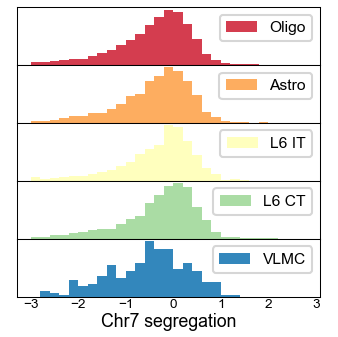

C:\Users\puzheng\AppData\Local\Temp/ipykernel_18836/3667927039.py:11: RuntimeWarning: invalid value encountered in log
  _ax.hist(np.log(subclass_2_chr_2_cisSegs[_subcls]['7']),


In [35]:
plot_subclasses = ['Oligo', 'Astro', 'L6 IT', 'L6 CT', 'VLMC']
plot_chr = '7'
from matplotlib.cm import Spectral

vmin,vmax = -3, 3

fig, axes = plt.subplots(len(plot_subclasses),1, 
                         figsize=(_single_col_width, _single_col_width), sharex=True, sharey=False, dpi=150)

for _i, (_subcls, _ax) in enumerate(zip(plot_subclasses, axes)):
    _ax.hist(np.log(subclass_2_chr_2_cisSegs[_subcls]['7']), 
             bins=np.arange(vmin, vmax, 0.2), linewidth=0,
             alpha=1, label=f'{_subcls}', color=Spectral((_i+0.5)/len(plot_subclasses)))
    _ax.legend(fontsize=_font_size, markerscale=0.1)
    _ax.tick_params('both', labelsize=_font_size-1, 
                    width=0, length=0,
                    pad=1, labelleft=False, labelbottom=False) # remove bottom ticklabels for ax
    [i[1].set_linewidth(_ticklabel_width) for i in _ax.spines.items()]

    
fig.subplots_adjust(wspace=0.0, hspace=0.0, left=0.05, right=0.95, top=0.98, bottom=0.12)

axes[-1].tick_params(labelbottom=True)
axes[-1].set_xlabel(f"Chr{plot_chr} segregation", fontsize=_font_size+1, labelpad=1)
plt.savefig(os.path.join(comp_figure_folder, f"cisSegregation_chr{plot_chr}_histograms.pdf"),
            transparent=True, bbox_inches='tight', dpi=300)
plt.show()

In [18]:
subclass_2_medianCisSegs = {}
for _subcls, _chr2segs in subclass_2_chr_2_cisSegs.items():
    if _subcls == 'other':
        continue
    
    _median_segs = []
    for _chr in chr_2_indices:
        if _chr == 'Y':
            continue
        if _chr not in _chr2segs:
            _median_segs.append(np.nan)
        else:
            _median_segs.append(np.nanmedian(np.log(_chr2segs[_chr])))
    subclass_2_medianCisSegs[_subcls] = _median_segs
cisSeg_df = pd.DataFrame(subclass_2_medianCisSegs).transpose()
cisSeg_df.columns = list(chr_2_indices)[:-1]

C:\Users\puzheng\AppData\Local\Temp/ipykernel_18836/1171870403.py:13: RuntimeWarning: divide by zero encountered in log
  _median_segs.append(np.nanmedian(np.log(_chr2segs[_chr])))


<IPython.core.display.Javascript object>


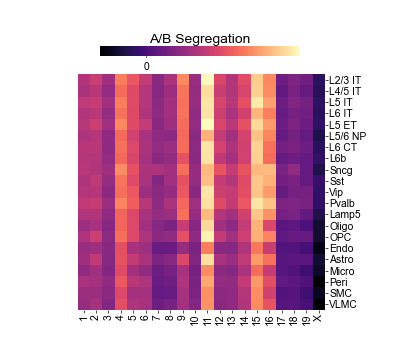

In [22]:
import seaborn as sns
sorted_cisSeg_df = cisSeg_df.loc[_celltype_order]

ax = sns.clustermap(sorted_cisSeg_df, 
                    cmap='magma', 
                    col_cluster=False, row_cluster=False, method='average', metric='seuclidean', 
                    figsize=(4,3.5), xticklabels=True, yticklabels=True,
                    cbar_kws=dict(ticks=[-2,-1,0], orientation='horizontal'),
                    )
ax.ax_heatmap.tick_params('both', labelsize=_font_size, 
                width=_ticklabel_width, length=_ticklabel_size,
                pad=1, labelleft=False, labelbottom=True) # remove bottom ticklabels for ax
[i[1].set_linewidth(_ticklabel_width) for i in ax.ax_heatmap.spines.items()]

x0, _y0, _w, _h = ax.cbar_pos
ax.ax_cbar.set_position([0.25, 0.84, 0.5, 0.03])
ax.ax_cbar.tick_params(axis='x', length=1, labelsize=_font_size)
ax.ax_cbar.set_title('A/B Segregation', pad=2, fontsize=10)
plt.savefig(os.path.join(comp_figure_folder, f"cisSegregation_median_heatmap.pdf"),
            transparent=True, bbox_inches='tight', dpi=300)
plt.show()

In [59]:
subclass_2_chr_2_transSegs = {}

for _subcls in subclass_2_chr2ZxysList:
    if _subcls == 'other':
        continue
    print(_subcls)
    _chr2Zxys_list = subclass_2_chr2ZxysList[_subcls]
    _chr2transABratios_list = subclass_2_transABRatioDicts[_subcls]
    
    subclass_2_chr_2_transSegs[_subcls] = {}
    for _chr2Zxys, _chr2ABratios in zip(_chr2Zxys_list, _chr2transABratios_list):
        for _chr, _zxys_list in _chr2Zxys.items():
            _abratios = _chr2ABratios[_chr]
            for _ih, _zxys in enumerate(_zxys_list):
                _Aratios = _abratios[_ih][ensemble_chr_2_AB[_chr]['A']]
                _Bratios = _abratios[_ih][ensemble_chr_2_AB[_chr]['B']]
                _seg = np.nanmedian(_Aratios) - np.nanmedian(_Bratios)
                if _chr not in subclass_2_chr_2_transSegs[_subcls]:
                    subclass_2_chr_2_transSegs[_subcls][_chr] = [_seg]
                else:
                    subclass_2_chr_2_transSegs[_subcls][_chr].append(_seg)
        

Oligo
L6b
Astro
VLMC
OPC
Endo
L6 CT
Peri
Micro
L6 IT
Sncg
L2/3 IT
Sst
L5 IT
Vip
Pvalb
Lamp5
L5/6 NP
L5 ET
L4/5 IT
SMC


<IPython.core.display.Javascript object>


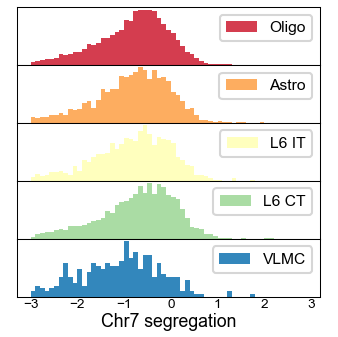

C:\Users\puzheng\AppData\Local\Temp/ipykernel_18836/3527193627.py:11: RuntimeWarning: invalid value encountered in log
  _ax.hist(np.log(subclass_2_chr_2_transSegs[_subcls]['7']),


In [60]:
plot_subclasses = ['Oligo', 'Astro', 'L6 IT', 'L6 CT', 'VLMC']
plot_chr = '7'
from matplotlib.cm import Spectral

vmin,vmax = -3, 3

fig, axes = plt.subplots(len(plot_subclasses),1, 
                         figsize=(_single_col_width, _single_col_width), sharex=True, sharey=False, dpi=150)

for _i, (_subcls, _ax) in enumerate(zip(plot_subclasses, axes)):
    _ax.hist(np.log(subclass_2_chr_2_transSegs[_subcls]['7']), 
             bins=np.arange(vmin, vmax, 0.1), linewidth=0,
             alpha=1, label=f'{_subcls}', color=Spectral((_i+0.5)/len(plot_subclasses)))
    _ax.legend(fontsize=_font_size, markerscale=0.1)
    _ax.tick_params('both', labelsize=_font_size-1, 
                    width=0, length=0,
                    pad=1, labelleft=False, labelbottom=False) # remove bottom ticklabels for ax
    [i[1].set_linewidth(_ticklabel_width) for i in _ax.spines.items()]

    
fig.subplots_adjust(wspace=0.0, hspace=0.0, left=0.05, right=0.95, top=0.98, bottom=0.12)

axes[-1].tick_params(labelbottom=True)
axes[-1].set_xlabel(f"Chr{plot_chr} segregation", fontsize=_font_size+1, labelpad=1)
plt.savefig(os.path.join(comp_figure_folder, f"transSegregation_chr{plot_chr}_histograms.pdf"),
            transparent=True, bbox_inches='tight', dpi=300)
plt.show()

In [61]:
subclass_2_medianTransSegs = {}
for _subcls, _chr2segs in subclass_2_chr_2_transSegs.items():
    if _subcls == 'other':
        continue
    
    _median_segs = []
    for _chr in chr_2_indices:
        if _chr == 'Y':
            continue
        if _chr not in _chr2segs:
            _median_segs.append(np.nan)
        else:
            _median_segs.append(np.nanmedian(np.log(_chr2segs[_chr])))
    subclass_2_medianTransSegs[_subcls] = _median_segs
transSeg_df = pd.DataFrame(subclass_2_medianTransSegs).transpose()
transSeg_df.columns = list(chr_2_indices)[:-1]

C:\Users\puzheng\AppData\Local\Temp/ipykernel_18836/3473170714.py:13: RuntimeWarning: invalid value encountered in log
  _median_segs.append(np.nanmedian(np.log(_chr2segs[_chr])))


<IPython.core.display.Javascript object>


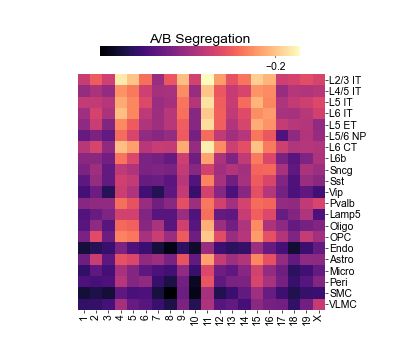

In [63]:
import seaborn as sns
sorted_transSeg_df = transSeg_df.loc[_celltype_order]

ax = sns.clustermap(sorted_transSeg_df, 
                    cmap='magma', #vmin=-0.2,vmax=0.3,
                    col_cluster=False, row_cluster=False, method='average', metric='seuclidean', 
                    figsize=(4,3.5), xticklabels=True, yticklabels=True,
                    cbar_kws=dict(ticks=[-0.2,0,0.2], orientation='horizontal'),
                    )
ax.ax_heatmap.tick_params('both', labelsize=_font_size, 
                width=_ticklabel_width, length=_ticklabel_size,
                pad=1, labelleft=False, labelbottom=True) # remove bottom ticklabels for ax
[i[1].set_linewidth(_ticklabel_width) for i in ax.ax_heatmap.spines.items()]

x0, _y0, _w, _h = ax.cbar_pos
ax.ax_cbar.set_position([0.25, 0.84, 0.5, 0.03])
ax.ax_cbar.tick_params(axis='x', length=1, labelsize=_font_size)
ax.ax_cbar.set_title('A/B Segregation', pad=2, fontsize=10)
plt.savefig(os.path.join(comp_figure_folder, f"transSegregation_median_heatmap.pdf"),
            transparent=True, bbox_inches='tight', dpi=300)
plt.show()

<IPython.core.display.Javascript object>


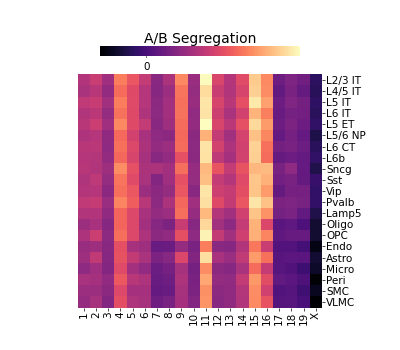

In [51]:
import seaborn as sns
sorted_cisSeg_df = cisSeg_df.loc[_celltype_order]

ax = sns.clustermap(sorted_cisSeg_df, 
                    cmap='magma', 
                    col_cluster=False, row_cluster=False, method='average', metric='seuclidean', 
                    figsize=(4,3.5), xticklabels=True, yticklabels=True,
                    cbar_kws=dict(ticks=[-2,-1,0], orientation='horizontal'),
                    )
ax.ax_heatmap.tick_params('both', labelsize=_font_size, 
                width=_ticklabel_width, length=_ticklabel_size,
                pad=1, labelleft=False, labelbottom=True) # remove bottom ticklabels for ax
[i[1].set_linewidth(_ticklabel_width) for i in ax.ax_heatmap.spines.items()]

x0, _y0, _w, _h = ax.cbar_pos
ax.ax_cbar.set_position([0.25, 0.84, 0.5, 0.03])
ax.ax_cbar.tick_params(axis='x', length=1, labelsize=_font_size)
ax.ax_cbar.set_title('A/B Segregation', pad=2, fontsize=10)
plt.savefig(os.path.join(comp_figure_folder, f"cisSegregation_median_heatmap.pdf"),
            transparent=True, bbox_inches='tight', dpi=300)
plt.show()

In [72]:
subclass_2_chr_2_transSegs = {}

for _subcls in subclass_2_chr2ZxysList:
    print(_subcls)
    _chr2Zxys_list = subclass_2_chr2ZxysList[_subcls]
    _chr2transAB_list = subclass_2_transScoreDicts[_subcls]
    
    subclass_2_chr_2_transSegs[_subcls] = {}
    for _chr2Zxys, _chr2ABscores in zip(_chr2Zxys_list, _chr2transAB_list):
        for _chr, _zxys_list in _chr2Zxys.items():
            _abscores_list = _chr2ABscores[_chr]
            for _ih, _zxys in enumerate(_zxys_list):
                _As = _abscores_list['A'][_ih]
                _Bs = _abscores_list['B'][_ih]
                _seg = (np.nanmedian(_As[ensemble_chr_2_AB[_chr]['A']]) / np.nanmedian(_As[ensemble_chr_2_AB[_chr]['B']])) /\
                    (np.nanmedian(_Bs[ensemble_chr_2_AB[_chr]['A']]) / np.nanmedian(_Bs[ensemble_chr_2_AB[_chr]['B']]))
                
                if _chr not in subclass_2_chr_2_transSegs[_subcls]:
                    subclass_2_chr_2_transSegs[_subcls][_chr] = [_seg]
                else:
                    subclass_2_chr_2_transSegs[_subcls][_chr].append(_seg)

Oligo
L6b
Astro
VLMC
OPC
Endo
L6 CT
Peri
Micro
L6 IT
Sncg
L2/3 IT
Sst
L5 IT
Vip
Pvalb
Lamp5
L5/6 NP
L5 ET
L4/5 IT
SMC
other


In [73]:
subclass_2_medianTransSegs = {}
for _subcls, _chr2segs in subclass_2_chr_2_transSegs.items():
    if _subcls == 'other':
        continue
    
    _median_segs = []
    for _chr in chr_2_indices:
        if _chr == 'Y':
            continue
        if _chr not in _chr2segs:
            _median_segs.append(np.nan)
        else:
            _median_segs.append(np.nanmedian(np.log(_chr2segs[_chr])))
    subclass_2_medianTransSegs[_subcls] = _median_segs
transSeg_df = pd.DataFrame(subclass_2_medianTransSegs).transpose()
transSeg_df.columns = list(chr_2_indices)[:-1]

<IPython.core.display.Javascript object>


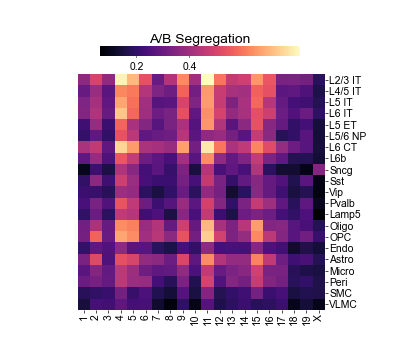

In [74]:
import seaborn as sns
sorted_transSeg_df = transSeg_df.loc[_celltype_order]

ax = sns.clustermap(sorted_transSeg_df, 
                    cmap='magma', #vmin=-0.2,vmax=0.3,
                    col_cluster=False, row_cluster=False, method='average', metric='seuclidean', 
                    figsize=(4,3.5), xticklabels=True, yticklabels=True,
                    cbar_kws=dict(ticks=[-0.2,0,0.2,0.4], orientation='horizontal'),
                    )
ax.ax_heatmap.tick_params('both', labelsize=_font_size, 
                width=_ticklabel_width, length=_ticklabel_size,
                pad=1, labelleft=False, labelbottom=True) # remove bottom ticklabels for ax
[i[1].set_linewidth(_ticklabel_width) for i in ax.ax_heatmap.spines.items()]

x0, _y0, _w, _h = ax.cbar_pos
ax.ax_cbar.set_position([0.25, 0.84, 0.5, 0.03])
ax.ax_cbar.tick_params(axis='x', length=1, labelsize=_font_size)
ax.ax_cbar.set_title('A/B Segregation', pad=2, fontsize=10)
plt.savefig(os.path.join(comp_figure_folder, f"transSegregation_median_heatmap.pdf"),
            transparent=True, bbox_inches='tight', dpi=300)
plt.show()